In [1]:
import pandas as pd

In [2]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
pima = pd.read_csv("datasets_228_482_diabetes.csv", header=None, names=col_names)

In [4]:
pima.drop([0],inplace=True)
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1


In [5]:
feature_cols = ['pregnant','insulin','bmi','age','glucose','bp','pedigree']

X = pima[feature_cols]
y = pima.label

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [8]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

logreg.fit(X_train,y_train)

y_pred = logreg.predict(X_test)

C:\Users\Admin\anaconda3\envs\boot_env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [9]:
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[117,  13],
       [ 24,  38]], dtype=int64)

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 257.44, 'Predicted label')

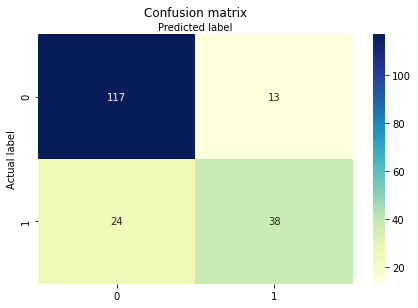

In [15]:
class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)

sns.heatmap(pd.DataFrame(cnf_matrix),annot=True,cmap='YlGnBu',fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix',y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [31]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test.astype(int), y_pred.astype(int)))
print("Recall:",metrics.recall_score(y_test.astype(int), y_pred.astype(int)))

Accuracy: 0.8072916666666666
Precision: 0.7450980392156863
Recall: 0.6129032258064516


In [38]:
y_pred_proba

array([0.95080377, 0.16134319, 0.1072555 , 0.62628758, 0.12734973,
       0.03784934, 0.74080373, 0.85227668, 0.4595176 , 0.405156  ,
       0.57140418, 0.96321784, 0.30844846, 0.23219226, 0.13820302,
       0.16060237, 0.83820374, 0.02725589, 0.3941085 , 0.26519006,
       0.62882347, 0.44323874, 0.24617514, 0.0691834 , 0.0541441 ,
       0.33485547, 0.04477536, 0.91158157, 0.09841935, 0.13940576,
       0.46192014, 0.24752967, 0.10172992, 0.47409238, 0.09172118,
       0.68047555, 0.41852437, 0.07584498, 0.30901949, 0.69184577,
       0.29840803, 0.24584961, 0.16367046, 0.76499232, 0.75041613,
       0.00676814, 0.07328896, 0.18305188, 0.3632877 , 0.29805585,
       0.381227  , 0.18476014, 0.88473921, 0.43245992, 0.15942   ,
       0.00331849, 0.05877416, 0.57097835, 0.26567838, 0.06422654,
       0.68436951, 0.48186091, 0.0972995 , 0.75449532, 0.63822372,
       0.89461961, 0.68607891, 0.13300309, 0.38058215, 0.11159805,
       0.12106884, 0.41505511, 0.09539701, 0.95477163, 0.83943

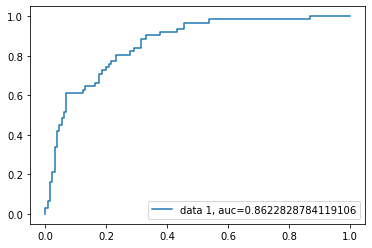

In [35]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr,tpr,_ = metrics.roc_curve(y_test.astype(int),y_pred_proba)
auc = metrics.roc_auc_score(y_test,y_pred_proba)
plt.plot(fpr,tpr,label='data 1, auc='+str(auc))
plt.legend(loc=4)
plt.show()